In [29]:
# Code to get all the Posterior mean (95% Equal-tail CI) (95% HPD CI) HPD-CI-width from ./xenarthra_mcmc_out.txt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Read the file
file = open("PM_MF_Q_middle_out.txt", "r")
lines = file.readlines()
file.close()

# Extract the data
data = []
mu_data = []
var_data = []

read_flag = False
for line in lines:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data.append(line)
    if read_flag and line.startswith("mu"):
        mu_data.append(line)
    if read_flag and line.startswith("sigma"):
        var_data.append(line)

In [30]:
data

['t_n55          9.5881 ( 8.8170, 10.8027) ( 8.7484, 10.6784)  1.9300 (Jnode 106)\n',
 't_n56          9.4470 ( 8.7377, 10.5991) ( 8.6670, 10.4887)  1.8217 (Jnode 105)\n',
 't_n57          8.6699 ( 8.0547,  9.7276) ( 7.9686,  9.5926)  1.6240 (Jnode 104)\n',
 't_n58          7.2528 ( 6.7858,  8.1263) ( 6.7283,  8.0108)  1.2825 (Jnode 103)\n',
 't_n59          6.9560 ( 6.5048,  7.7954) ( 6.4546,  7.6946)  1.2399 (Jnode 102)\n',
 't_n60          6.5994 ( 6.1654,  7.3958) ( 6.1270,  7.3109)  1.1839 (Jnode 101)\n',
 't_n61          6.0553 ( 5.6441,  6.7936) ( 5.5937,  6.7069)  1.1131 (Jnode 100)\n',
 't_n62          2.7883 ( 2.4325,  3.2292) ( 2.4100,  3.2017)  0.7917 (Jnode 99)\n',
 't_n63          4.2860 ( 3.9201,  4.8396) ( 3.8774,  4.7817)  0.9043 (Jnode 98)\n',
 't_n64          3.0735 ( 2.7634,  3.4968) ( 2.7445,  3.4643)  0.7198 (Jnode 97)\n',
 't_n65          2.6784 ( 2.3970,  3.0590) ( 2.3730,  3.0246)  0.6516 (Jnode 96)\n',
 't_n66          2.0883 ( 1.8494,  2.3968) ( 1.8361,  2.38

In [31]:
node_name = []
posterior_mean_iqtree = []
posterior_mean_baseml = []

posterior_mean_mu_iqtree = []
posterior_mean_mu_baseml = []

posterior_mean_var_iqtree = []
posterior_mean_var_baseml = []

lower_ci_iqtree = []
upper_ci_iqtree = []

lower_ci_mu_iqtree = []
upper_ci_mu_iqtree = []

lower_ci_var_iqtree = []
upper_ci_var_iqtree = []

# Credible intervals for McmcDate
lower_ci_baseml = []
upper_ci_baseml = []

lower_ci_mu_baseml = []
upper_ci_mu_baseml = []

lower_ci_var_baseml = []
upper_ci_var_baseml = []

In [32]:
for line in data:
    line = line.strip().split()
    node_name.append(line[0])
    posterior_mean_iqtree.append(float(line[1]))
#     if line[3].startswith('('):
#         lower_ci_iqtree.append(float(line[3][1:-1]))
#     else:
#         lower_ci_iqtree.append(float(line[3][1:-1]))
#     if line[4].startswith('('):
#         upper_ci_iqtree.append(float(line[4][1:-1]))
#     else:
#         upper_ci_iqtree.append(float(line[4][:-1]))
#     # posterior_mean_baseml.append(float(line[4]))
#     # lower_ci_baseml.append(float(line[5]))
#     # upper_ci_baseml.append(float(line[6]))
# 
# for line in mu_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_mu_iqtree.append(float(line[1]))
#     lower_ci_mu_iqtree.append(float(line[3][:-1]))
#     upper_ci_mu_iqtree.append(float(line[4][:-1]))
#
# for line in var_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_iqtree.append(float(line[1]))
#     lower_ci_var_iqtree.append(float(line[3][:-1]))
#     upper_ci_var_iqtree.append(float(line[4][:-1]))

In [33]:
node_name

['t_n55',
 't_n56',
 't_n57',
 't_n58',
 't_n59',
 't_n60',
 't_n61',
 't_n62',
 't_n63',
 't_n64',
 't_n65',
 't_n66',
 't_n67',
 't_n68',
 't_n69',
 't_n70',
 't_n71',
 't_n72',
 't_n73',
 't_n74',
 't_n75',
 't_n76',
 't_n77',
 't_n78',
 't_n79',
 't_n80',
 't_n81',
 't_n82',
 't_n83',
 't_n84',
 't_n85',
 't_n86',
 't_n87',
 't_n88',
 't_n89',
 't_n90',
 't_n91',
 't_n92',
 't_n93',
 't_n94',
 't_n95',
 't_n96',
 't_n97',
 't_n98',
 't_n99',
 't_n100',
 't_n101',
 't_n102',
 't_n103',
 't_n104',
 't_n105',
 't_n106',
 't_n107']

In [34]:
posterior_mean_iqtree

[9.5881,
 9.447,
 8.6699,
 7.2528,
 6.956,
 6.5994,
 6.0553,
 2.7883,
 4.286,
 3.0735,
 2.6784,
 2.0883,
 1.429,
 0.9573,
 0.3856,
 3.2301,
 6.6811,
 5.9791,
 6.0254,
 4.3215,
 3.8079,
 3.4732,
 6.559,
 6.1815,
 5.8956,
 5.5608,
 5.0761,
 4.8811,
 4.2418,
 3.8569,
 3.5029,
 2.6549,
 2.3668,
 4.3257,
 3.4612,
 6.3872,
 1.5635,
 6.1867,
 5.7348,
 5.0786,
 4.6617,
 3.4177,
 3.8123,
 4.8954,
 4.6237,
 4.1459,
 3.3265,
 4.1478,
 7.7661,
 5.8688,
 3.7295,
 2.9176,
 6.6158]

In [35]:
lower_ci_iqtree

[]

In [36]:
upper_ci_iqtree

[]

In [37]:
file_LG = open("LG_middle_out.txt", "r")
lines1 = file_LG.readlines()
file_LG.close()

# Extract the data
data1 = []
mu_data1 = []
var_data1 = []

read_flag = False
for line in lines1:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data1.append(line)
    if read_flag and line.startswith("mu"):
        mu_data1.append(line)
    if read_flag and line.startswith("sigma"):
        var_data1.append(line)

        
for line in data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_baseml.append(float(line[1]))
#     if line[3].startswith('('):
#         lower_ci_baseml.append(float(line[3][1:-1]))
#     else:
#          lower_ci_baseml.append(float(line[3][:-1]))
#     if line[4].startswith('('):
#         upper_ci_baseml.append(float(line[4][1:-1]))
#     else:
#          upper_ci_baseml.append(float(line[4][:-1]))
#         
#     
# for line in mu_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_mu_baseml.append(float(line[1]))
#     lower_ci_mu_baseml.append(float(line[3][:-1]))
#     upper_ci_mu_baseml.append(float(line[4][:-1]))
    
# for line in var_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_baseml.append(float(line[1]))
#     lower_ci_var_baseml.append(float(line[3][:-1]))
#     upper_ci_var_baseml.append(float(line[4][:-1]))

In [38]:
import matplotlib.pyplot as plt
import numpy as np

# # Example data
# # Posterior means for MCMCtree (x-axis) and McmcDate (y-axis)
# posterior_mean_mcmctree = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# posterior_mean_mcmcdate = [110, 210, 310, 410, 510, 610, 710, 810, 910, 1010]
# 
# # Credible intervals for MCMCtree
# lower_ci_mcmctree = [90, 180, 270, 360, 450, 540, 630, 720, 810, 900]
# upper_ci_mcmctree = [110, 220, 330, 440, 550, 660, 770, 880, 990, 1100]
# 
# # Credible intervals for McmcDate
# lower_ci_mcmcdate = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# upper_ci_mcmcdate = [120, 220, 320, 420, 520, 620, 720, 820, 920, 1020]

# Calculate error bars
# xerr = [np.array(lower_ci_baseml), 
#         np.array(upper_ci_baseml)]
# yerr = [np.array(lower_ci_iqtree), 
#         np.array(upper_ci_iqtree)]
# 
# # Plotting
# fig, ax = plt.subplots(figsize=(15, 15))
# ax.plot([-0.1,90], 
#         [-0.1, 90], 
#         'k--', label='y=x')
# ax.errorbar(posterior_mean_baseml, posterior_mean_iqtree, 
#             xerr=xerr, yerr=yerr, fmt='*', ecolor='r', capsize=3, label='95% HPD CI')
# 
# # Labels and title
# ax.set_xlabel('Posterior mean age LG [100 Mya]', fontsize=18)
# ax.set_ylabel('Posterior mean age LG+G4 [100 Mya]', fontsize=18)
# ax.set_title('Posterior mean age comparison between LG and LG+G4 models [t116 ~ B(1.25,2.482)]')
# ax.legend()
# 
# # Show plot
# # plt.show()
# plt.savefig('./animal_origin_posterior_mean_age_comparison_LG_G4_c11.png')

In [39]:
posterior_mean_baseml

[10.5517,
 10.2194,
 9.0969,
 7.6467,
 7.2285,
 6.7209,
 5.9935,
 2.8739,
 4.2142,
 2.9634,
 2.4874,
 1.8592,
 1.2256,
 0.8095,
 0.345,
 3.1082,
 6.8085,
 5.6188,
 6.0189,
 4.2701,
 3.618,
 3.4858,
 6.8442,
 6.3389,
 5.9925,
 5.5604,
 5.0086,
 4.7277,
 3.9932,
 3.5146,
 3.0798,
 2.2878,
 1.9412,
 4.1663,
 3.2391,
 6.5665,
 1.711,
 6.2833,
 5.72,
 4.9109,
 4.3763,
 3.1408,
 3.386,
 4.7469,
 4.3172,
 3.6455,
 3.1343,
 4.1039,
 7.9701,
 5.9345,
 3.6057,
 3.1978,
 7.588]

In [40]:
posterior_mean_iqtree

[9.5881,
 9.447,
 8.6699,
 7.2528,
 6.956,
 6.5994,
 6.0553,
 2.7883,
 4.286,
 3.0735,
 2.6784,
 2.0883,
 1.429,
 0.9573,
 0.3856,
 3.2301,
 6.6811,
 5.9791,
 6.0254,
 4.3215,
 3.8079,
 3.4732,
 6.559,
 6.1815,
 5.8956,
 5.5608,
 5.0761,
 4.8811,
 4.2418,
 3.8569,
 3.5029,
 2.6549,
 2.3668,
 4.3257,
 3.4612,
 6.3872,
 1.5635,
 6.1867,
 5.7348,
 5.0786,
 4.6617,
 3.4177,
 3.8123,
 4.8954,
 4.6237,
 4.1459,
 3.3265,
 4.1478,
 7.7661,
 5.8688,
 3.7295,
 2.9176,
 6.6158]

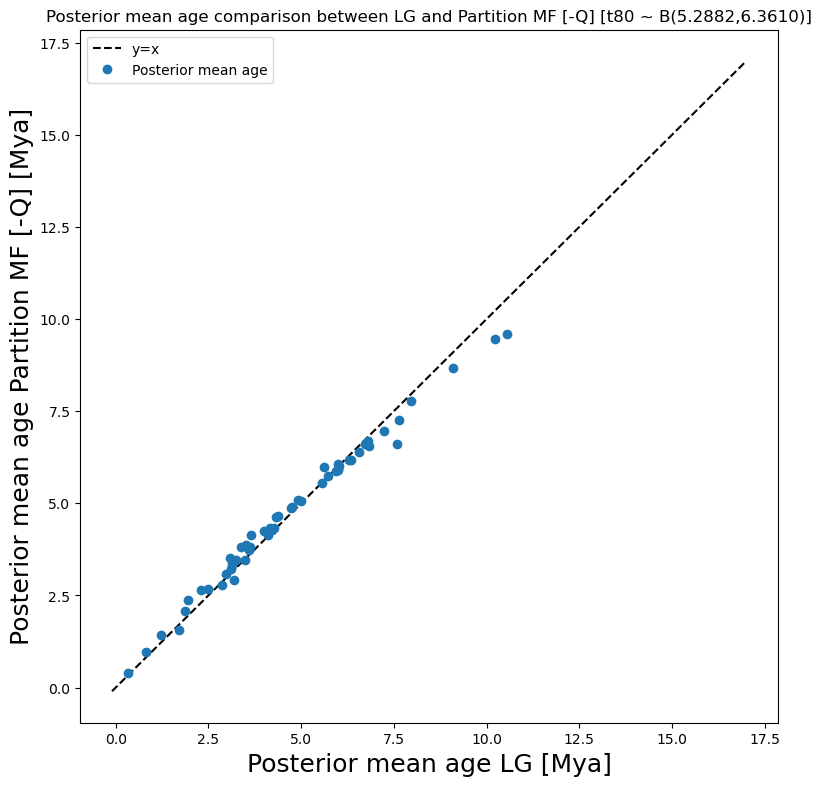

In [41]:
# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(9 ,9))
ax.plot([-0.1,17], 
        [-0.1, 17], 
        'k--', label='y=x')
ax.plot(posterior_mean_baseml, posterior_mean_iqtree, 'o', label='Posterior mean age')
 
# Labels and title
ax.set_xlabel('Posterior mean age LG [Mya]', fontsize=18)
ax.set_ylabel('Posterior mean age Partition MF [-Q] [Mya]', fontsize=18)
ax.set_title('Posterior mean age comparison between LG and Partition MF [-Q] [t80 ~ B(5.2882,6.3610)]')
ax.legend()

# point_x = posterior_mean_baseml[0]  # Example: first point in the list
# point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# Show plot
# plt.show()
plt.savefig('./metazoa_posterior_mean_age_comparison_partition_MF_Q_middle_scatter.png')

In [42]:
# fig, ax = plt.subplots(figsize=(9 ,9))
# ax.plot([0.01,0.04], 
#         [0.01, 0.04], 
#         'k--', label='y=x')
# ax.plot(posterior_mean_mu_baseml, posterior_mean_mu_iqtree, 'o', label='Posterior mean rates for partitions')
#  
# # Labels and title
# ax.set_xlabel('Posterior mean rate [LG]', fontsize=18)
# ax.set_ylabel('Posterior mean rate [LG+G4]', fontsize=18)
# ax.set_title('Posterior mean rate comparison between LG and LG+G4 [Cherry only calibration/IQ-TREE]')
# ax.legend()
# 
# # point_x = posterior_mean_baseml[0]  # Example: first point in the list
# # point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# # ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# # Show plot
# # plt.show()
# plt.savefig('./animal_origin__posterior_mean_rate_comparison_LG_G4_all_scatter.png')